In [ ]:
#import des packages

import pandas as pd
import numpy as np

Construction du Dataset

In [2]:
# Import des données 
 
    # Import des données des années 2020 et 2019

Usagers_19_20 = pd.concat([
    pd.read_csv('data/DataSource/usagers-2020.csv', sep = ';'), 
    pd.read_csv('data/DataSource/usagers-2019.csv', sep = ';')], 
    axis = 0)
Lieux_19_20 = pd.concat([
    pd.read_csv('data/DataSource/lieux-2020.csv', sep = ';'), 
    pd.read_csv('data/DataSource/lieux-2019.csv', sep = ';')], 
    axis = 0)
Caract_19_20 = pd.concat([
    pd.read_csv('data/DataSource/caracteristiques-2020.csv', sep = ';'), 
    pd.read_csv('data/DataSource/caracteristiques-2019.csv', sep = ';')],
    axis = 0)
Vehic_19_20 = pd.concat([
    pd.read_csv('data/DataSource/vehicules-2020.csv', sep = ';'), 
    pd.read_csv('data/DataSource/vehicules-2019.csv', sep = ';')], 
    axis = 0)

    # Import des données des années 2018,2017 et 2016

Usagers_16_18 = pd.concat([
    pd.read_csv('data/DataSource/usagers-2016.csv', sep = ','), 
    pd.read_csv('data/DataSource/usagers-2017.csv', sep = ','), 
    pd.read_csv('data/DataSource/usagers-2018.csv', sep = ',')], 
    axis = 0)
Lieux_16_18 = pd.concat([
    pd.read_csv('data/DataSource/lieux_2016.csv', sep = ',', low_memory=False), 
    pd.read_csv('data/DataSource/lieux-2017.csv', sep = ',', low_memory=False), 
    pd.read_csv('data/DataSource/lieux-2018.csv', sep = ',', low_memory=False)],
     axis = 0)
Caract_16_18 = pd.concat([
    pd.read_csv('data/DataSource/caracteristiques-2016.csv', sep = ',', encoding="ISO-8859-1"),
     pd.read_csv('data/DataSource/caracteristiques-2017.csv', sep = ',', encoding="ISO-8859-1"),
     pd.read_csv('data/DataSource/caracteristiques-2018.csv', sep = ',', encoding="ISO-8859-1")],
     axis = 0)
Vehic_16_18 = pd.concat([
    pd.read_csv('data/DataSource/vehicules-2016.csv', sep = ','), 
    pd.read_csv('data/DataSource/vehicules-2017.csv', sep = ','), 
    pd.read_csv('data/DataSource/vehicules-2018.csv', sep = ',')], 
    axis = 0)

In [3]:
#Création d'un dataset unique représentant les données agrégées sur un periode de 5 ans 
#######################################################################################  

    #les donnée de 2019/2020 ne sont pas renseignées de la même façon que les donnée des année précédantes
    #Dans le but de créer un dataset complet nous devons ici uniformiser les données des 5 derniere années


    #---------------------------------------------------------
    #uniformisation et fusion des données pour chaque fichiers
    #---------------------------------------------------------

        # Fichiers Caractéristiques
Caract_19_20['hrmn'] = (Caract_19_20['hrmn'].astype(str).str[0:2] + Caract_19_20['hrmn'].astype(str).str[3:5]).astype(int)
Caract_19_20['dep'] = Caract_19_20['dep'].replace(['2A','2B'],[201,202])
Caract_19_20["com"] = (Caract_19_20['dep'].astype(str) + Caract_19_20['com'].astype(str).str[2:]).astype(int)
Caract_16_18 = Caract_16_18.drop(['gps'], axis=1)
Caract_16_18 = Caract_16_18[['Num_Acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep','com', 'agg','int', 'atm', 'col', 'adr', 'lat', 'long']]
Caract_16_18["an"] = Caract_16_18["an"]+2000
Caract_16_18['dep'] = Caract_16_18['dep'].replace(["2A","2B"],[201,202])
Caract_16_18["com"] = Caract_16_18['dep']* 100 + Caract_16_18["com"]
Caract_16_18['dep'] = (Caract_16_18['dep'].astype(float)/10).astype(int)
Caract_16_18['col'] = (Caract_16_18['col'].fillna(-1)).astype(int)
Caract_16_18['atm'] = (Caract_16_18['atm'].fillna(-1)).astype(int)
            # Concaténation 
Caract_16_20 = pd.concat([Caract_16_18, Caract_19_20], axis = 0)


        # Fichier Lieux
Lieux_19_20 = Lieux_19_20.drop(['vma'], axis=1)   
Lieux_16_18 = Lieux_16_18.drop(['env1'], axis=1)
Lieux_16_18 = Lieux_16_18[['Num_Acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'vosp', 'prof','pr', 'pr1', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ']]
Lieux_16_18['circ'] = (Lieux_16_18['circ'].fillna(-1)).astype(int)
Lieux_16_18['vosp'] = (Lieux_16_18['vosp'].fillna(-1)).astype(int)
Lieux_16_18['prof'] = (Lieux_16_18['prof'].fillna(-1)).astype(int)
Lieux_16_18['plan'] = (Lieux_16_18['plan'].fillna(-1)).astype(int)
Lieux_16_18['surf'] = (Lieux_16_18['surf'].fillna(-1)).astype(int)
Lieux_16_18['infra'] = (Lieux_16_18['infra'].fillna(-1)).astype(int)
Lieux_16_18['situ'] = (Lieux_16_18['situ'].fillna(-1)).astype(int)
Lieux_16_18['pr'] = Lieux_16_18['pr'].fillna(-1).astype(int)
Lieux_16_18['pr1'] = Lieux_16_18['pr1'].fillna(-1).astype(int)
            #Concaténation 
Lieux_16_20 = pd.concat([Lieux_16_18, Lieux_19_20], axis = 0)


        # Fichier Vehicule
Vehic_19_20 = Vehic_19_20.drop(['occutc','motor', 'id_vehicule' ], axis=1) 
Vehic_16_18 = Vehic_16_18[['Num_Acc', 'num_veh', 'senc', 'catv', 'obs', 'obsm','choc', 'manv']]
Vehic_16_18['senc'] = (Vehic_16_18['senc'].fillna(-1)).astype(int)
Vehic_16_18['obs'] = (Vehic_16_18['obs'].fillna(-1)).astype(int)
Vehic_16_18['obsm'] = (Vehic_16_18['obsm'].fillna(-1)).astype(int)
Vehic_16_18['choc'] = (Vehic_16_18['choc'].fillna(-1)).astype(int)
Vehic_16_18['manv'] = (Vehic_16_18['manv'].fillna(-1)).astype(int)  
            #Concaténation 
Vehic_16_20 = pd.concat([Vehic_16_18, Vehic_19_20], axis = 0)

        # Fichier Usager
Usagers_19_20['secu'] = Usagers_19_20['secu1']
Usagers_19_20 = Usagers_19_20.drop(['id_vehicule', 'secu1','secu2','secu3'  ], axis=1)
Usagers_16_18 = Usagers_16_18[['Num_Acc', 'num_veh', 'place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'locp', 'actp', 'etatp', 'secu']]
Usagers_16_18['etatp'] = (Usagers_16_18['etatp'].fillna(-1)).astype(int)
Usagers_16_18['trajet'] = (Usagers_16_18['trajet'].fillna(-1)).astype(int) 
Usagers_16_18['locp'] = (Usagers_16_18['locp'].fillna(-1)).astype(int)
Usagers_16_18['actp'] = (Usagers_16_18['actp'].fillna(-1)).astype(int)

    # Cas particulier Secu 
        # avant 01/2019 la sécu etait renseignée sur 2 chiffres 1er: présence de l'équipement, 2eme utilisation de l'équipement 
        # apres 01/2019 la secu est sur un seul caractère représentant la présence et l'utilisation de l'équipement.

def ConvSecu(i):
    use = i/10%1*10
    if use == 2:
        x = 0        
    else:
        if use == 3:
            x = 9
        else:
            x = i//10
    return x


Usagers_16_18['secu'] = (Usagers_16_18['secu'].fillna(-1)).astype(int).apply(ConvSecu)
            #Concaténation 
Usagers_16_20 = pd.concat([Usagers_16_18, Usagers_19_20], axis = 0)



    #--------------------------------------------
    # Merge des 4 fichiers = dataset Unique 5 ans
    #--------------------------------------------

All_Data = Usagers_16_20.merge( Vehic_16_20, on=['Num_Acc', 'num_veh']).merge(Lieux_16_20, on=['Num_Acc']).merge(Caract_16_20, on=['Num_Acc'])




    #---------------------------------------
    # traitement des valeurs non renseignées 
    #---------------------------------------
    
        #Dans le dataset complet nous avons différentes valeurs représentant les données non renseignées (NaN, 0, et/ou -1)
        #Ici nous allons unfiformiser ces données :
        
            #remplacement des données non-renseignées par NaN ( valeur -1 = non renseignée)
All_Data = All_Data.replace([-1],[np.nan])  

            # Dans la feature "trajet" la valeur 0 = non renseigné
All_Data["trajet"] = All_Data["trajet"].replace([0],[np.nan])

            # Dans les features "circ","plan",'surf', 'int' et "Prof" présence de la valeur 0 ne correspondant à aucune catégorie...remplacement par np.Nan
All_Data["circ"] = All_Data["circ"].replace([0],[np.nan])
All_Data["prof"] = All_Data["prof"].replace([0],[np.nan])
All_Data["plan"] = All_Data["plan"].replace([0],[np.nan])
All_Data["surf"] = All_Data["surf"].replace([0],[np.nan])
All_Data["int"] = All_Data["int"].replace([0],[np.nan])




Exploration de données et  Visualisation 

Machine Learning

In [4]:
# Préparation du dataset pour ML 
#################################

        #------------------------------
        #Gestion des valeurs manquantes
        #------------------------------ 

                #classement des features par pourcentage de valeur manquante

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total NaN Values', 'Percentage of NaN Values'])

missing_data(All_Data)

KeyboardInterrupt: 

In [ ]:

        
                # supression des features qui ont plus de 6% de NaN + adr qui ne sera pas utile par la suite 

Data_clean= All_Data.drop(["v2","v1","lartpc", "etatp", "larrout", "pr1", "pr",  "trajet", "locp", "voie", "actp", "lat", "long", "adr"], axis=1)

                # pour les autres features remplacement des NaN par la valeur la plus représentée 

Data_clean = Data_clean.apply(lambda x: x.fillna(x.value_counts().index[0]))
Data_clean[Data_clean.columns[2:]] = Data_clean[Data_clean.columns[2:]].astype(int)

        #---------------------------------------
        #simplification des features du dataset
        #--------------------------------------- 

                # Création d'une feature catégorie d'age

Data_clean['catage'] = Data_clean['an'] - Data_clean['an_nais']
Data_clean['catage'] = pd.cut(Data_clean['catage'], bins = [0,18,30,45,60,110], labels =[1,2,3,4,5])
Data_clean = Data_clean.apply(lambda x: x.fillna(x.value_counts().index[0]))

                # Création d'une feature WE (semaine = 1 WE = 2)
import calendar
Data_clean["WE"] =  Data_clean["jour"].astype(str) + " " + Data_clean["mois"].astype(str) + " " + Data_clean["an"].astype(str)

def findDay(date):
    day, month, year = (int(i) for i in date.split(' '))   
    dayNumber = calendar.weekday(year, month, day)
    days =[1, 1, 1, 1, 1, 2, 2]
    return (days[dayNumber])

Data_clean["WE"] = Data_clean["WE"].apply(findDay)

                #simplification de la catégorie des vehicule
                        
Data_clean["catv"] = Data_clean["catv"].replace([80],1 ) #cat 1 velo (1+80)                           
Data_clean["catv"] = Data_clean["catv"].replace([33,30,31,41,42,43,32,34,35,36],2) #cat 2 deux roues à moteur +quad                          
Data_clean["catv"] = Data_clean["catv"].replace([7,3,10],3 ) #cat 3 voiture/voiturette/vu                          
Data_clean["catv"] = Data_clean["catv"].replace([13,14,15],4)#cat 4 Poids Lourds                           
Data_clean["catv"] = Data_clean["catv"].replace([37,38,39,40],5)#cat 5 Transport collectif                          
Data_clean["catv"] = Data_clean["catv"].replace([16,17,20,21],6 )#cat 6 Engin agricole                         
Data_clean["catv"] = Data_clean["catv"].replace([99,50,60,0],7)#cat 7 Autre: EDP,indeterminable


                #simplification de la catégorie manoeuvre
                             
Data_clean["catv"] = Data_clean["catv"].replace([12],11)# regroupement changement de fille                             
Data_clean["catv"] = Data_clean["catv"].replace([14],13)# regroupement deporté                            
Data_clean["catv"] = Data_clean["catv"].replace([16],15)# regroupement tournant                          
Data_clean["catv"] = Data_clean["catv"].replace([8],7)# regroupement Dans le couloir bus,                           
Data_clean["catv"] = Data_clean["catv"].replace([18],17)# regroupement Dépassement




                #supression des informations redondantes ou inutiles 
Data_Model= Data_clean.drop(["com", "hrmn", "senc",'an_nais', 'an', 'jour', 'Num_Acc','num_veh', 'dep' ], axis=1)
Data_Model = Data_Model.astype(object)
Data_Model

,place,catu,grav,sexe,secu,catv,obs,obsm,choc,manv,...,infra,situ,mois,lum,agg,int,atm,col,catage,WE
0,1,1,1,2,1,3,0,0,1,1,...,0,1,2,1,2,1,8,3,3,1
1,1,1,3,1,2,2,0,0,7,15,...,0,1,2,1,2,1,8,3,1,1
2,1,1,3,1,1,3,6,0,1,1,...,0,1,3,1,2,6,1,6,4,1
3,2,2,3,1,1,3,6,0,1,1,...,0,1,3,1,2,6,1,6,1,1
4,3,2,3,2,1,3,6,0,1,1,...,0,1,3,1,2,6,1,6,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638007,1,1,4,2,1,3,0,2,1,2,...,0,1,11,1,1,1,8,4,3,1
638008,1,1,4,1,1,3,3,0,1,21,...,0,1,11,4,1,1,1,6,2,2
638009,1,1,3,1,2,2,0,0,7,1,...,0,1,11,1,1,1,1,7,3,2
638010,1,1,4,1,1,3,0,2,4,0,...,0,2,11,3,1,1,1,2,3,1


ML


In [ ]:
#Création de 3 DataSet 

    # 1- 4 classes à prédire (0 = 'Indemme', 1 = 'Tué', 2 = 'Blessé hospitalisé', 3 = 'Blessé léger')
data_4C = Data_Model.copy()
data_4C['grav'] = data_4C['grav'].replace([1,2,3,4],[0,1,2,3]).astype(int)
y_4c = data_4C.grav
x_4c = data_4C.drop(columns='grav')

    # 1- 3 classes à prédire (0 = 'Indemme', 1 = 'Tué', 2 = 'Blessé)
data_3C = Data_Model.copy()    
data_3C['grav'] = data_3C['grav'].replace([1,2,3,4],[0,1,2,2]).astype(int)
y_3c = data_3C.grav
x_3c = data_3C.drop(columns='grav')

    # 1- 2 classes à prédire (0 = 'vivant', 1 = 'Tué')
data_2C = Data_Model.copy()   
data_2C['grav'] = data_2C['grav'].replace([1,2,3,4],[0,1,0,0]).astype(int)
y_2c = data_2C.grav
x_2c = data_2C.drop(columns='grav')

In [ ]:

y_4c.value_counts()

0    263799
3    240094
2    117192
1     16927
Name: grav, dtype: int64

In [ ]:
# graph value count = donnée déséquilibrées 

In [ ]:
# rééquilibrage des données par undersampling

from imblearn.under_sampling import RandomUnderSampler

def underSamping(X, y):
    rus = RandomUnderSampler(random_state=42, replacement=True)
    X_rus, y_rus = rus.fit_resample(X, y)
    return X_rus, y_rus

In [ ]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

def splitting(X, y):
    # hot encoding of the features
    X = pd.get_dummies(X)
    # Normalizing the data
    #X = normalize(X.values)
    # Splitting the data for training and test purpose
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= .3)
    return X_train, X_test, y_train, y_test

4 Classe

In [ ]:
X, y = underSamping(x_4c, y_4c)
X_train, X_test, y_train, y_test = splitting(X, y)

c:\Users\girar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Base model accuracy  : 0.576
              precision    recall  f1-score   support

           0      0.666     0.773     0.716      5031
           1      0.588     0.658     0.621      5067
           2      0.488     0.390     0.434      5159
           3      0.528     0.489     0.508      5056

    accuracy                          0.576     20313
   macro avg      0.568     0.577     0.569     20313
weighted avg      0.567     0.576     0.569     20313



c:\Users\girar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


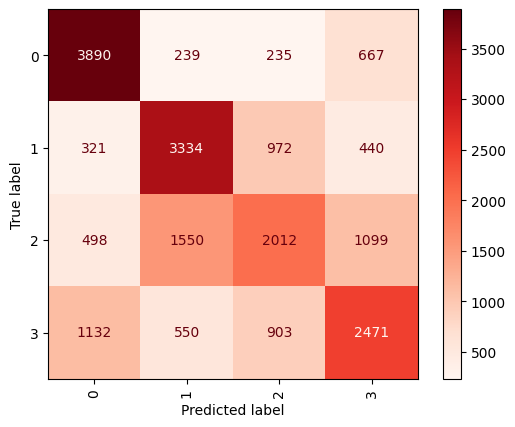

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report

model_rf = RandomForestClassifier().fit(X_train, y_train)
# Predictions (test)
predictions_test = model_rf.predict(X_test)
model_rf_score = model_rf.score(X_test, y_test)
print('Base model accuracy  : {:04.3f}'.format(model_rf_score))
print(classification_report(y_test, predictions_test, digits=3, zero_division = 1)),
disp = plot_confusion_matrix(model_rf, X_test, y_test, cmap='Reds', values_format='d',
                            #  display_labels=labels_disp,
                            xticks_rotation= 'vertical')


Fitting to the train set : 0.55
Base model accuracy  : 0.549
              precision    recall  f1-score   support

           0      0.629     0.770     0.693      5031
           1      0.566     0.640     0.600      5067
           2      0.455     0.332     0.384      5159
           3      0.497     0.459     0.477      5056

    accuracy                          0.549     20313
   macro avg      0.537     0.550     0.538     20313
weighted avg      0.536     0.549     0.537     20313



c:\Users\girar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


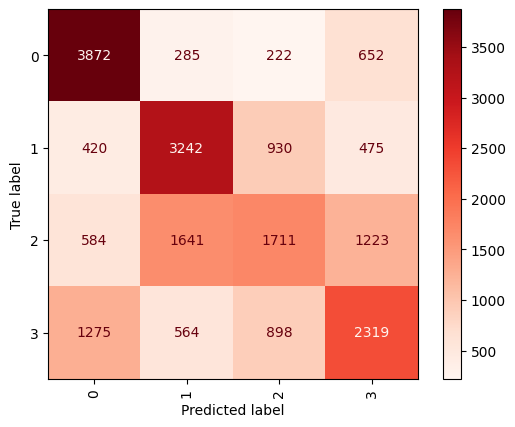

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
 
model_xgb = GradientBoostingClassifier().fit(X_train, y_train)
model_xgb_score = model_xgb.score(X_test, y_test)
print("Fitting to the train set : {:04.2f}".format(model_xgb_score))
predictions_test = model_xgb.predict(X_test)
print('Base model accuracy  : {:04.3f}'.format(model_xgb.score(X_test, y_test)))
print(classification_report(y_test, predictions_test, digits=3, zero_division = 1)),
disp = plot_confusion_matrix(model_xgb, X_test, y_test, cmap='Reds', values_format='d',
                            #  display_labels=labels_disp,
                            xticks_rotation= 'vertical')

In [ ]:
target = Data_Model['grav'].replace([1,2,3,4],[0,1,2,3]).astype(int)
data = Data_Model.drop('grav', axis = 1)


from dataclasses import dataclass
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

selectkbest = SelectKBest(score_func= chi2, k=15).fit(data, target)
sel_bool = selectkbest.get_support()

data = data[data.columns[sel_bool]]
data

,place,catu,secu,catv,obs,obsm,choc,manv,nbv,plan,situ,agg,int,col,catage
0,1,1,1,3,0,0,1,1,0,3,1,2,1,3,3
1,1,1,2,2,0,0,7,15,0,3,1,2,1,3,1
2,1,1,1,3,6,0,1,1,0,2,1,2,6,6,4
3,2,2,1,3,6,0,1,1,0,2,1,2,6,6,1
4,3,2,1,3,6,0,1,1,0,2,1,2,6,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638007,1,1,1,3,0,2,1,2,2,1,1,1,1,4,3
638008,1,1,1,3,3,0,1,21,3,1,1,1,1,6,2
638009,1,1,2,2,0,0,7,1,1,3,1,1,1,7,3
638010,1,1,1,3,0,2,4,0,3,1,2,1,1,2,3


In [ ]:
data = pd.get_dummies(data)

data = data.astype(int)

c:\Users\girar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


#rus = RandomUnderSampler()
#X_train, y_train = rus.fit_resample(X_train, y_train)


model = RandomForestClassifier()
model.fit(X_train, y_train)


ypred = model.predict(X_test)
cr = classification_report(y_test, ypred,
    output_dict=False)
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.80      0.75     52706
           1       0.23      0.07      0.10      3380
           2       0.47      0.37      0.41     23602
           3       0.58      0.59      0.59     47915

    accuracy                           0.62    127603
   macro avg       0.50      0.46      0.46    127603
weighted avg       0.60      0.62      0.61    127603



In [ ]:
# fonction affichage METRIC Precision Recall Curve multiclass

def precision_recall_curve(y_test,y_score):

    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import average_precision_score
    import matplotlib.pyplot as plt

        # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()


    # For each class
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve( y_test.ravel(), y_score.ravel())
    average_precision["micro"] = average_precision_score(y_test, y_score, average="micro")


    # visualisation :
    from sklearn.metrics import PrecisionRecallDisplay
    from itertools import cycle

    # setup plot details
    colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

    _, ax = plt.subplots(figsize=(7, 8))

    f_scores = np.linspace(0.2, 0.8, num=4)
    lines, labels = [], []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
        plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))


    display = PrecisionRecallDisplay(
        recall=recall["micro"],
        precision=precision["micro"],
        average_precision=average_precision["micro"],
    )
    display.plot(ax = ax, name="Micro-average precision-recall", color="gold")

    for i, color in zip(range(n_classes), colors):
        display = PrecisionRecallDisplay(
            recall=recall[i],
            precision=precision[i],
            average_precision=average_precision[i],
        )
        display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)


    # add the legend for the iso-f1 curves
    handles, labels = display.ax_.get_legend_handles_labels()
    handles.extend([l])
    labels.extend(["iso-f1 curves"])
    # set the legend and the axes
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.legend(handles=handles, labels=labels, loc="best")
    ax.set_title("Extension of Precision-Recall curve to multi-class")

    return (average_precision["micro"], plt.show())


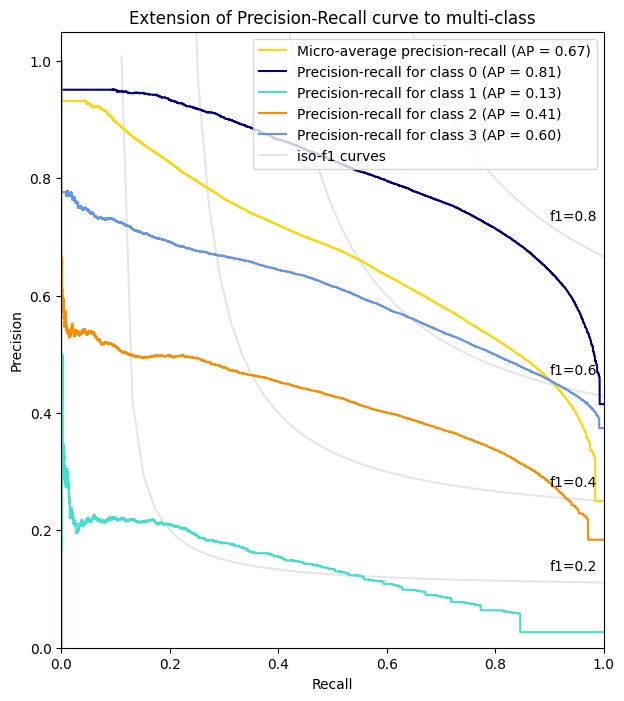

(0.6719122802711639, None)

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from sklearn.metrics import classification_report



n_classes = len(set(target))

dataY = label_binarize(target, classes=[*range(n_classes)])
X_train, X_test, y_train, y_test = train_test_split(data, dataY, test_size=0.2)


clf = OneVsRestClassifier(RandomForestClassifier())

clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)

# Affichage
precision_recall_curve(y_test,y_score)

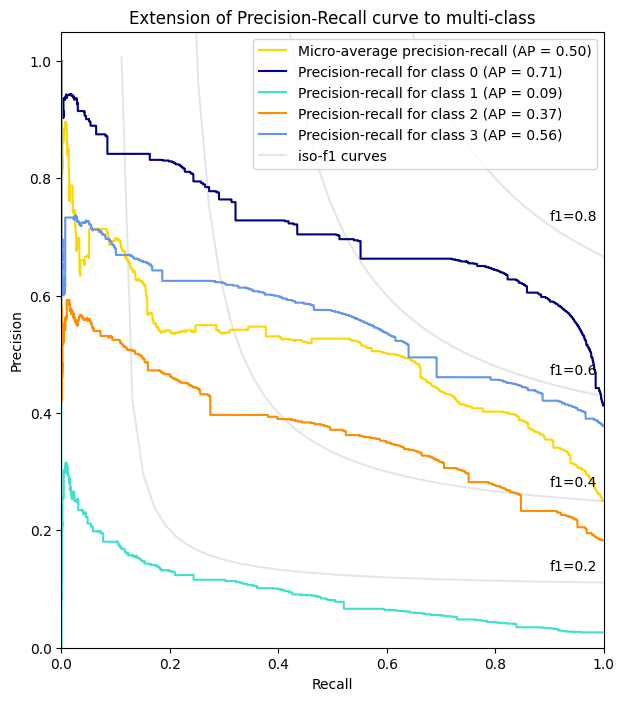

(0.5048650611157914, None)

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from sklearn.metrics import classification_report



n_classes = len(set(target))

dataY = label_binarize(target, classes=[*range(n_classes)])
X_train, X_test, y_train, y_test = train_test_split(data, dataY, test_size=0.2)


clf = OneVsRestClassifier(RandomForestClassifier(class_weight = 'balanced'))

clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)

# Affichage
precision_recall_curve(y_test,y_score)








In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


n_classes = len(set(target))

dataY = label_binarize(target, classes=[*range(n_classes)])
X_train, X_test, y_train, y_test = train_test_split(data, dataY, test_size=0.2)

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler('majority')
X_train, y_train = rus.fit_resample(X_train, y_train)


clf = OneVsRestClassifier(RandomForestClassifier())

clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)

# Affichage
precision_recall_curve(y_test,y_score)



c:\Users\girar\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


ValueError: multilabel-indicator format is not supported

c:\Users\girar\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


[01:05:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:06:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:06:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be 

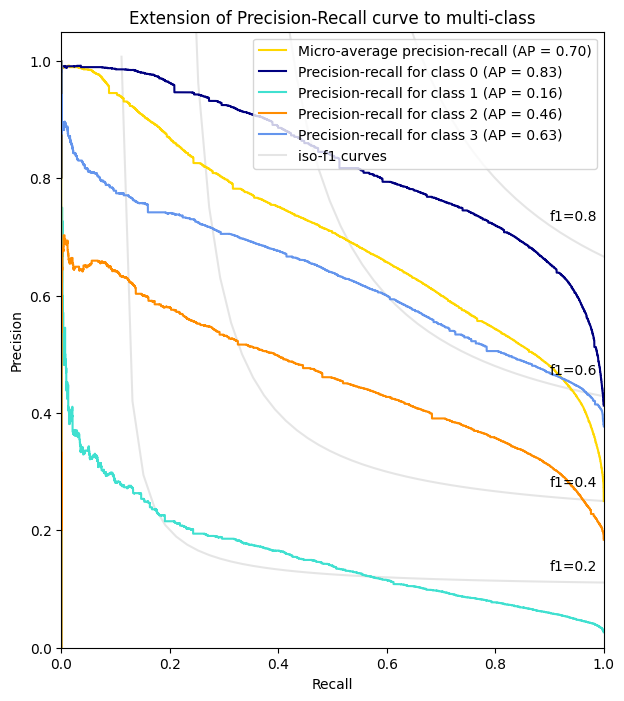

(0.7032556325065372, None)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler('majority')
data1, target1 = rus.fit_resample(data, target)


n_classes = len(set(target1))
dataY = label_binarize(target, classes=[*range(n_classes)])

X_train, X_test, y_train, y_test = train_test_split(data, dataY, test_size=0.2)


clf = OneVsRestClassifier(xgb.XGBClassifier(max_depth=5,  objective= 'multi:softprob', num_class= 2, eval_metric = "aucpr", scale_pos_weight = 70,  ))
#clf = OneVsRestClassifier(xgb.XGBClassifier(max_depth=5,  objective='binary:logistic', scale_pos_weight = 70, eval_metric = "aucpr"))
clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)


# Affichage
precision_recall_curve(y_test,y_score)




In [ ]:
target2 = Data_Model['grav'].replace([1,2,3,4],[0,1,1,0]).astype(int)
data2 = data.astype(int)

0.5288711085080692


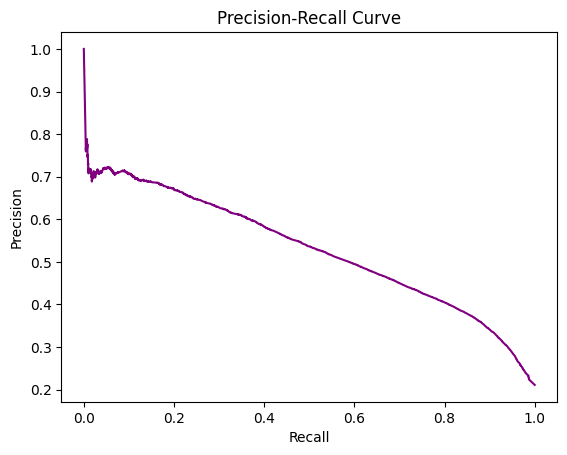

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data2, target2, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision = average_precision_score(y_test, y_score)

print(average_precision)

precision, recall, thresholds = precision_recall_curve(y_test, y_score)


#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()



In [ ]:
clf = xgb.XGBClassifier()

clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision = average_precision_score(y_test, y_score)

print(average_precision)

precision, recall, thresholds = precision_recall_curve(y_test, y_score)


#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='blue')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

NameError: name 'xgb' is not defined

In [ ]:
y_score

array([[0.97      , 0.03      ],
       [0.45654835, 0.54345165],
       [0.95      , 0.05      ],
       ...,
       [0.79      , 0.21      ],
       [0.3       , 0.7       ],
       [0.96      , 0.04      ]])

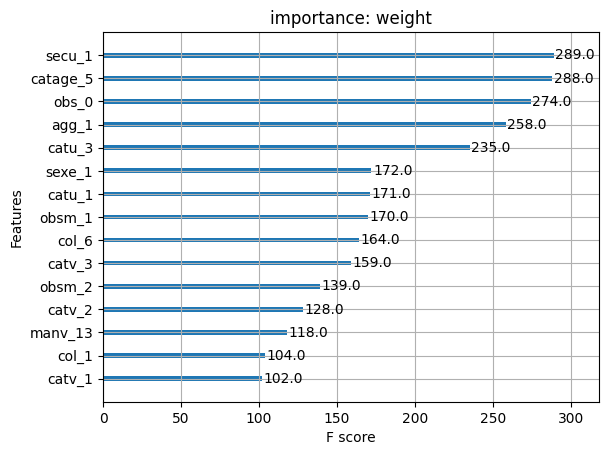

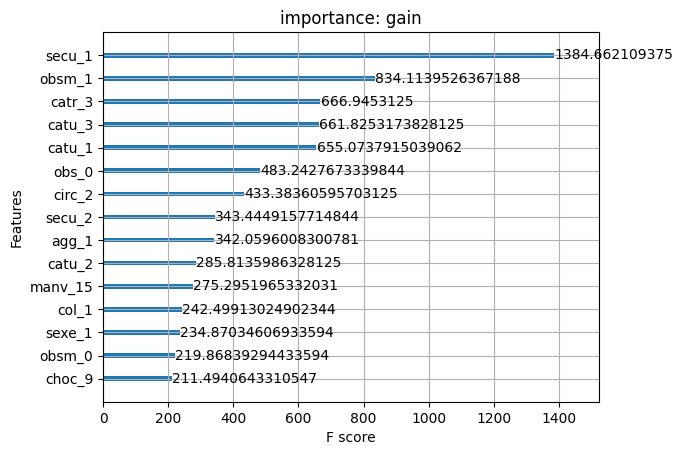

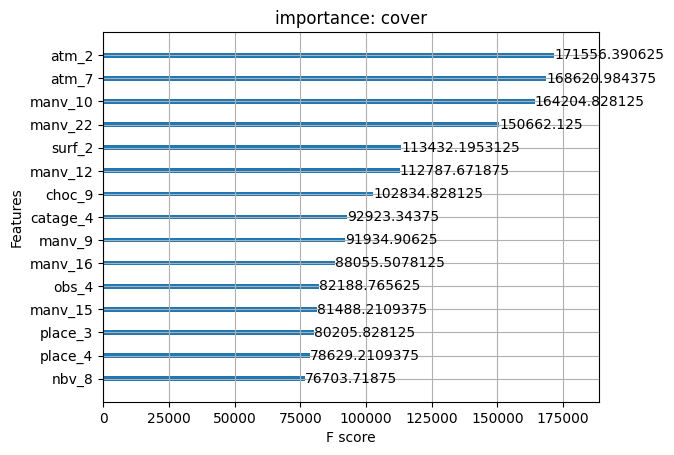

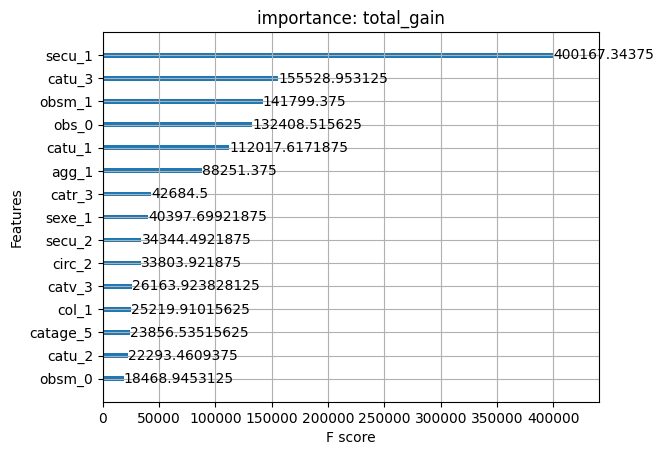

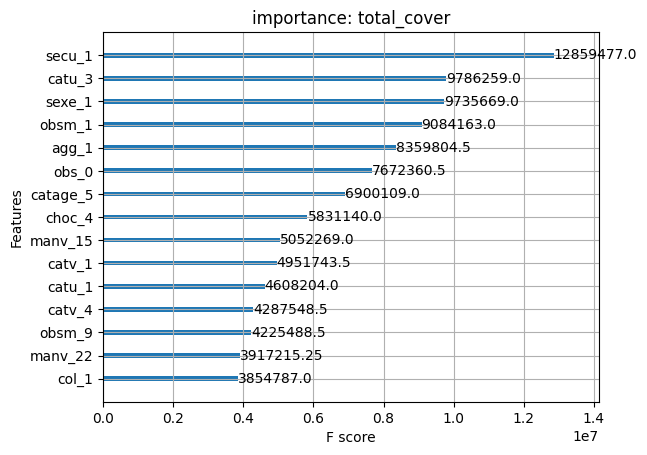

In [ ]:
types= ['weight', 'gain', 'cover', 'total_gain', 'total_cover']

for f in types:
    xgb.plot_importance(xgb1 ,max_num_features=15, importance_type=f, title='importance: '+f);

In [ ]:
preds = xgb1.predict(test)
preds

array([0., 3., 3., ..., 0., 3., 3.], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
predictions = [round(value) for value in preds]
accuracy = accuracy_score(y_test, predictions)

accuracy

0.6543860260183556